In [ ]:
# Metriken

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = {
    "Fold": [0, 1, 2, 3, 4],
    "Dice": [0.8779, 0.9140489748189862, 0.8436681224100171, 0.8342609784103995, 0.884],
    "IoU":  [0.8113, 0.8745177710702641, 0.7717529725830516, 0.7673592499994675, 0.818],
    "FP":   [582.2, 233.464, 701.1, 639.02, 570.0],
    "FN":   [661.1, 582.048, 792.52, 885.34, 650.0],
}

df = pd.DataFrame(data)  # <-- DAS war der wichtige Schritt
print(df)                # <-- Debug: du siehst sofort, ob Fold 1 wirklich 0 ist



   Fold      Dice       IoU       FP       FN
0     0  0.877900  0.811300  582.200  661.100
1     1  0.914049  0.874518  233.464  582.048
2     2  0.843668  0.771753  701.100  792.520
3     3  0.834261  0.767359  639.020  885.340
4     4  0.884000  0.818000  570.000  650.000


In [29]:
def plot_metric(df, metric, ylabel):
    # Debug: zeigt dir exakt, was geplottet wird
    print("\nPLOTTING:")
    print(df[["Fold", metric]])
    mean = df[metric].mean()
    std = df[metric].std(ddof=0)  # ddof=0 entspricht numpy std

    plt.figure()
    plt.bar(df["Fold"], df[metric])

    plt.xlabel("Fold")
    plt.ylabel(ylabel)
    plt.title(f"{metric} pro Fold")

    # Mittelwert-Linie
    plt.axhline(mean, linestyle="--", label=f"Mean = {mean:.3f}")

    # Textbox
    plt.text(
        0.95, 0.95,
        f"μ = {mean:.3f}\nσ = {std:.3f}",
        ha="right",
        va="top",
        transform=plt.gca().transAxes,
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.8),
    )

    plt.ylim(bottom=0)  # damit man Fold=0 sauber sieht
    plt.legend()
    plt.show()



PLOTTING:
   Fold      Dice
0     0  0.877900
1     1  0.914049
2     2  0.843668
3     3  0.834261
4     4  0.884000


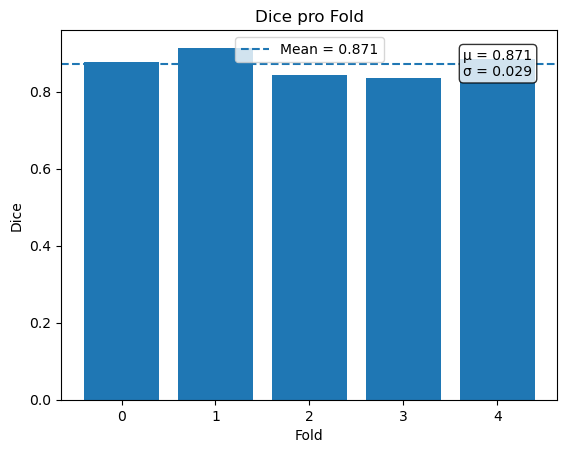


PLOTTING:
   Fold       IoU
0     0  0.811300
1     1  0.874518
2     2  0.771753
3     3  0.767359
4     4  0.818000


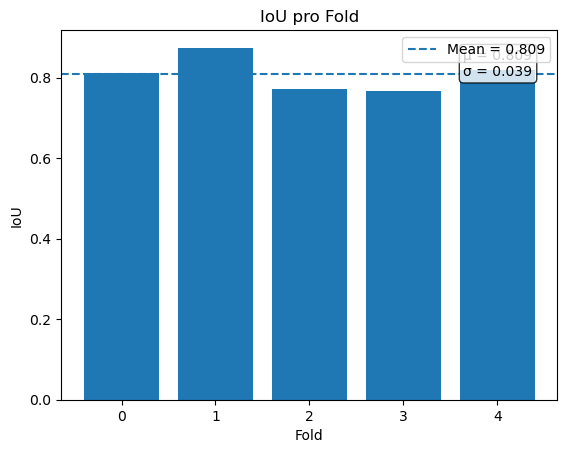


PLOTTING:
   Fold       FP
0     0  582.200
1     1  233.464
2     2  701.100
3     3  639.020
4     4  570.000


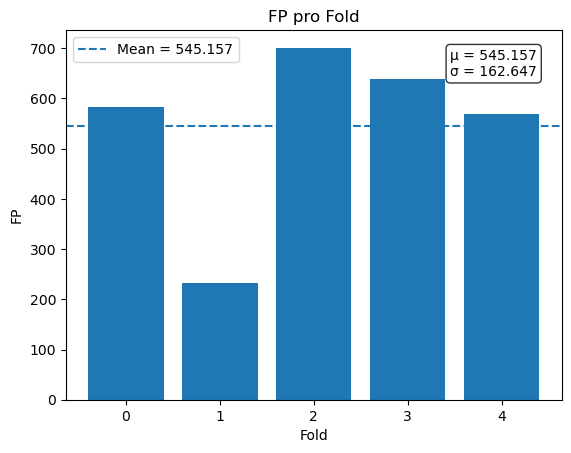


PLOTTING:
   Fold       FN
0     0  661.100
1     1  582.048
2     2  792.520
3     3  885.340
4     4  650.000


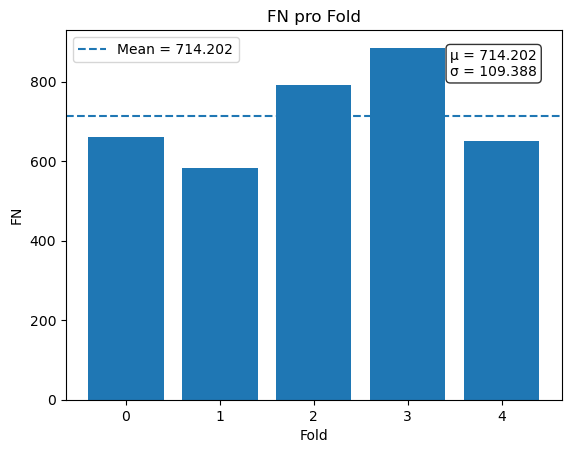

In [32]:
plot_metric(df, "Dice", "Dice")
plot_metric(df, "IoU", "IoU")
plot_metric(df, "FP", "FP")
plot_metric(df, "FN", "FN")



Text(0.5, 1.0, 'Dice-Verteilung über alle Folds')

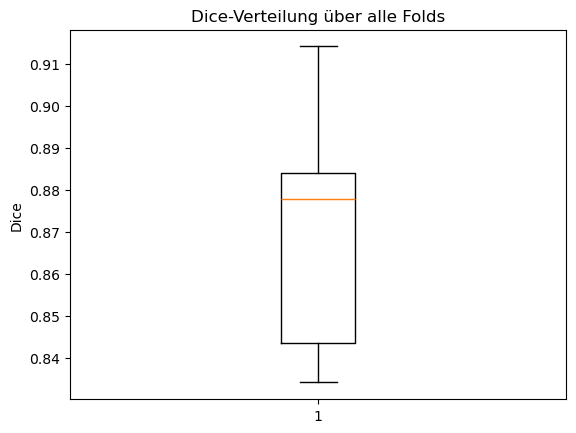

In [31]:
plt.boxplot(df["Dice"], vert=True)
plt.ylabel("Dice")
plt.title("Dice-Verteilung über alle Folds")


In [ ]:
# Formeln:
# n_ref  = TP + FN
# n_pred = TP + FP
# Vergleich von n_pred und n_ref zeigt Über- bzw. Untersegmentierungbitt
# Dice = 2·TP / (2·TP + FP + FN)
# IoU = TP / (TP + FP + FN)
# Precision = TP / (TP + FP) (wie 'sauber' ist die Vorhersage?)
# Recall = TP / (TP + FN) (wie viel vom echten Objekt wurde gefunden?)

